# Introduction to Data Science
# HW04 - Data Modeling
---

Student Name: Huỳnh Tấn Đạt

Student ID: 22127059

---

## 1. Introduction

In this notebook, we aimed to classify the quality of Portuguese **Vinho Verde** red wine using machine learning techniques. The key steps and findings are summarized below:

1. **Data Preparation**:
    - Loaded the wine quality dataset and performed exploratory data analysis (EDA).
    - Identified class imbalance with most wines rated between 5 and 6.
    - Converted the quality ratings into three categories: `bad`, `medium`, and `good`.

2. **Data Splitting and Standardization**:
    - Split the dataset into training (70%), validation (15%), and test (15%) sets.
    - Standardized the features to ensure consistent scaling.

3. **Model Training and Hyperparameter Tuning**:
    - Selected three classification models: Logistic Regression, Support Vector Machine (SVM), and Random Forest.
    - Performed hyperparameter tuning using GridSearchCV to find the best parameters for each model.

4. **Model Evaluation**:
    - Evaluated the models on the validation set using accuracy, precision, recall, and F1-score.
    - Random Forest outperformed the other models with the highest scores across all metrics.
    - Visualized the performance metrics and confusion matrices to understand the models' strengths and weaknesses.

5. **Final Model Evaluation**:
    - Evaluated the best-performing model (Random Forest) on the test set.
    - Achieved good overall performance with high accuracy, precision, recall, and F1-score.
    - Generated ROC curves and AUC values for each class, indicating the model's ability to distinguish between classes.
    - Identified key features contributing to the model's predictions using feature importance analysis.

---

### Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score

## 2. Data Preparation

### 2.1. Load Data 

Load the **Wine Quality** dataset

In [2]:
data_path = "./winequality.csv"
data = pd.read_csv(data_path)

Display the first 5 rows of the dataset

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Information about dataset

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


Check for missing values in the dataset

In [5]:
data.isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 2.2. Data Analysis and Visualization

Statistical measures of the dataset

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Analyzing wine quality via barplot

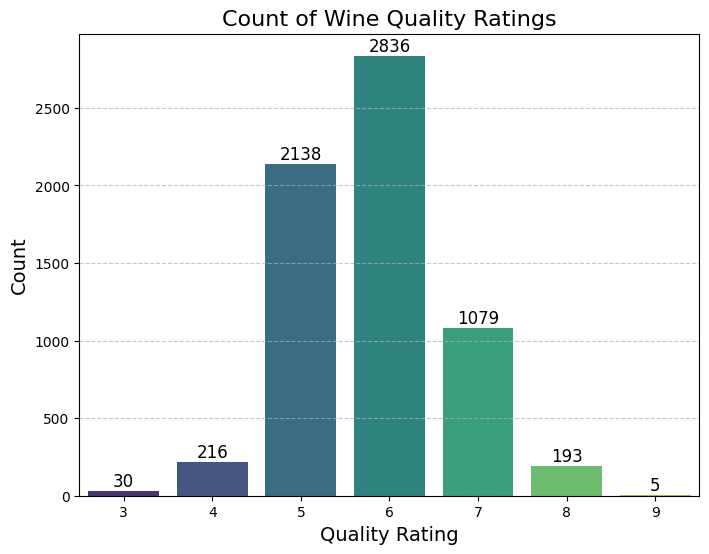

In [7]:
# Count quality ratings
quality_counts = data['quality'].value_counts().sort_index()

# Create a barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=quality_counts.index, y=quality_counts.values, palette='viridis')

# Annotate each bar with its count value
for i, count in enumerate(quality_counts.values):
    ax.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=12, color='black')

# Add labels and title
plt.title('Count of Wine Quality Ratings', fontsize=16)
plt.xlabel('Quality Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show();

**Insights**:

- **Imbalanced Quality Ratings**: Most wines are rated between 5 and 6, with very few samples rated as 3, 4, 8, or 9. This highlights class imbalance.
- **Common Quality Scores**:
    - **6** is the most frequent rating (2,836 samples), followed by 5 (2,138 samples).
    - Ratings of **7** and higher are much less common, indicating fewer high-quality wines.
- **Skewed Distribution:** The data is slightly skewed toward lower to moderate quality scores (5-6), which could influence model predictions.

Display correlations between all features via heatmap

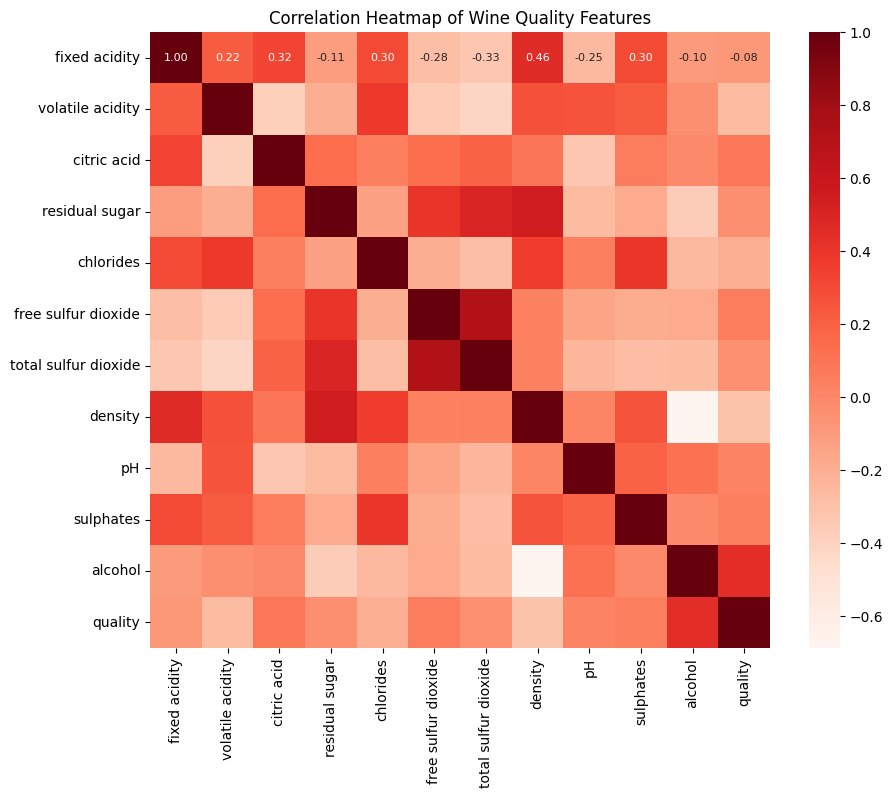

In [8]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cbar=True, annot=True, cmap='Reds', fmt=".2f", annot_kws={'size': 8})
plt.title("Correlation Heatmap of Wine Quality Features")
plt.show()

### 2.3. Data Conversion

Define the quality categories with numerical labels

In [9]:
def categorize_quality(quality):
    if quality <= 4:
        return 0  # bad
    elif quality <= 6:
        return 1  # medium
    else:
        return 2  # good

Apply the categorization function to the 'quality' column

In [10]:
data['quality_category'] = data['quality'].apply(categorize_quality)

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [11]:
category_labels = {0: 'bad', 1: 'medium', 2: 'good'}
data['quality_category_label'] = data['quality_category'].map(category_labels)

 Visualize the distribution of the new quality categories

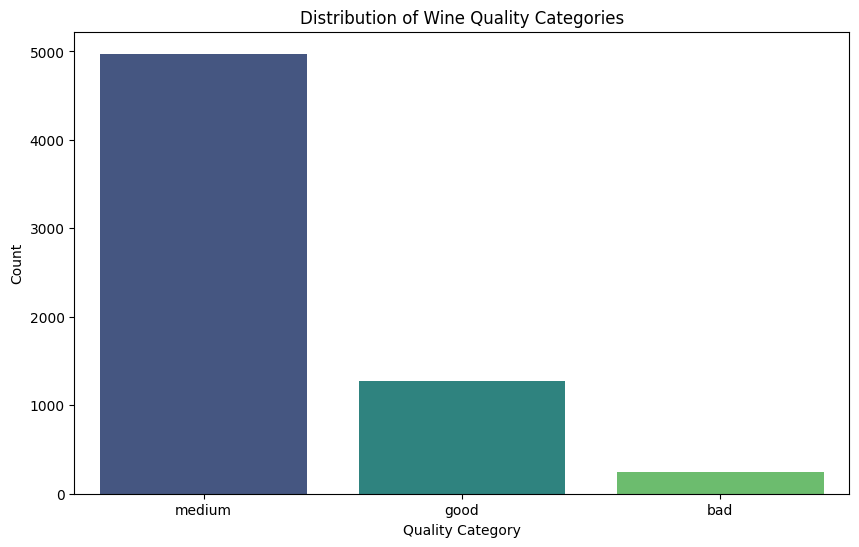

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='quality_category_label', palette='viridis')
plt.title('Distribution of Wine Quality Categories')
plt.xlabel('Quality Category')
plt.ylabel('Count')
plt.show();

### 2.4. Data Splitting

Splitting the dataset into **training**, **validation**, and **testing** sets:

- **Training set (70%)**: Used to train the model. 
- **Validation set (15%)**: Used to optimize and select the best parameters.
- **Testing set (15%)**: Used to evaluate the final model.

In [13]:
X = data.drop(columns=['quality', 'quality_category', 'quality_category_label'])
y = data['quality_category']

Split the data into training, validation, and test sets

In [14]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Standardize the features

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

---

## 3. Model Training & Hyperparameter Tuning

We'll choose **three classification models** to compare: 

1. **Logistic Regression**
2. **Support Vector Machine (SVM)**
3. **Random Forest**

Define the models and their parameter grids

In [16]:
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'Support Vector Machine': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': [0.01, 0.1, 1]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20, 30, 40, 50]
        }
    }
}

Perform **GridSearchCV** for each model

In [17]:
best_models = {}
for model_name, model_info in models.items():
    clf = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)
    best_models[model_name] = clf.best_estimator_
    print(f"Best parameters for {model_name}: {clf.best_params_}")

Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best parameters for Support Vector Machine: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best parameters for Random Forest: {'max_depth': 30, 'n_estimators': 50}


Before identifying the best-performing model, we evaluate each model's predictions on the validation set. This step ensures that we assess their performance in detail before final evaluation on the test set.

- **Classification Report**: Provides precision, recall, F1-score, and support for each class.
- **Confusion Matrix**: Displays the actual vs. predicted class distribution to understand misclassification patterns.

This analysis helps to fine-tune models and identify their strengths and weaknesses.

In [18]:
for model_name, model in best_models.items():
    y_pred = model.predict(X_valid)
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_valid, y_pred, zero_division=1))
    print(f"Confusion Matrix for {model_name}:\n")
    print(confusion_matrix(y_valid, y_pred))
    print("\n" + "-"*60 + "\n")

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       1.00      0.00      0.00        36
           1       0.80      0.97      0.88       755
           2       0.61      0.21      0.31       184

    accuracy                           0.79       975
   macro avg       0.80      0.39      0.40       975
weighted avg       0.77      0.79      0.74       975

Confusion Matrix for Logistic Regression:

[[  0  36   0]
 [  0 731  24]
 [  0 146  38]]

------------------------------------------------------------

Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

           0       1.00      0.00      0.00        36
           1       0.83      0.97      0.89       755
           2       0.72      0.37      0.49       184

    accuracy                           0.82       975
   macro avg       0.85      0.45      0.46       975
weighted avg       0.81      0.82      0.7

In [19]:
# Calculate evaluation metrics for each model
model_accuracies = []
model_precisions = []
model_recalls = []
model_f1_scores = []

for model_name, model in best_models.items():
    y_valid_pred = model.predict(X_valid)
    model_accuracies.append(accuracy_score(y_valid, y_valid_pred))
    report = classification_report(y_valid, y_valid_pred, output_dict=True, zero_division=1)
    model_precisions.append(report['weighted avg']['precision'])
    model_recalls.append(report['weighted avg']['recall'])
    model_f1_scores.append(report['weighted avg']['f1-score'])

# Create a DataFrame with the evaluation metrics
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Random Forest'],
    'Accuracy': model_accuracies,
    'Precision': model_precisions,
    'Recall': model_recalls,
    'F1 Score': model_f1_scores
})

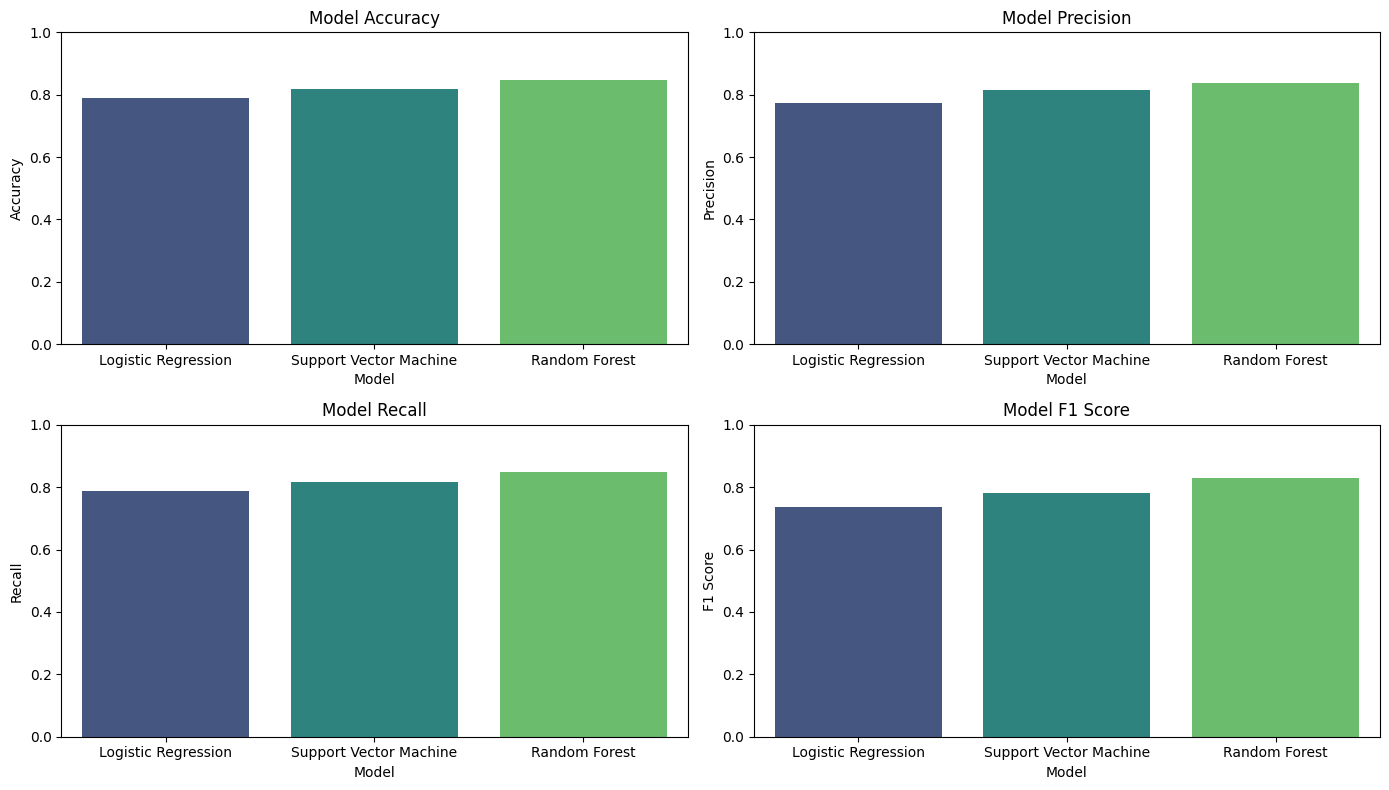

In [20]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Plot Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='viridis')
plt.title('Model Accuracy')
plt.ylim(0, 1)

# Plot Precision
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=metrics_df, palette='viridis')
plt.title('Model Precision')
plt.ylim(0, 1)

# Plot Recall
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=metrics_df, palette='viridis')
plt.title('Model Recall')
plt.ylim(0, 1)

# Plot F1 Score
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1 Score', data=metrics_df, palette='viridis')
plt.title('Model F1 Score')
plt.ylim(0, 1)

# Adjust layout
plt.tight_layout()
plt.show()

The provided bar chart presents a comparative analysis of three machine learning models - Logistic Regression, Support Vector Machine, and Random Forest - in predicting wine quality. Each model's performance is evaluated across four metrics: **accuracy**, **precision**, **recall**, and **F1-score**.

- **Random Forest Outperforms**: Random Forest consistently achieves the highest scores across all metrics, indicating superior performance in classifying wine quality compared to Logistic Regression and Support Vector Machine.
- **Balanced Performance**: All three models demonstrate relatively balanced performance in terms of precision and recall, suggesting that they are capable of accurately identifying both positive and negative instances.
- **Accuracy and F1-Score**: The F1-score, which is the harmonic mean of precision and recall, provides a more balanced evaluation metric. Random Forest also exhibits the highest F1-score, reinforcing its overall superiority.

The comparative analysis highlights the effectiveness of **Random Forest** in predicting wine quality. Its ability to capture complex patterns and relationships within the data makes it a valuable tool for this specific task.

---

## 4. Model Evaluation

This section evaluates the best-performing model selected during hyperparameter tuning using the test dataset. The steps involved are as follows:

- **Identify the Best Model**: Determine which model achieved the highest score during validation.

- **Calculate Performance Metrics**:
   - Compute overall metrics such as **accuracy**, **precision**, **recall**, and **F1 score** for the test dataset.
   - Generate a detailed **classification report** for class-specific performance.

- **Visualize Results**: Display the **confusion matrix** to examine prediction accuracy across all categories.

These evaluations help determine the model's overall effectiveness and reliability. 

Best Model: Random Forest
Accuracy: 0.8482
Precision: 0.8425
Recall: 0.8482
F1 Score: 0.8287

Classification Report:
              precision    recall  f1-score   support

         bad       0.80      0.12      0.21        33
      medium       0.86      0.97      0.91       747
        good       0.80      0.52      0.63       195

    accuracy                           0.85       975
   macro avg       0.82      0.54      0.58       975
weighted avg       0.84      0.85      0.83       975



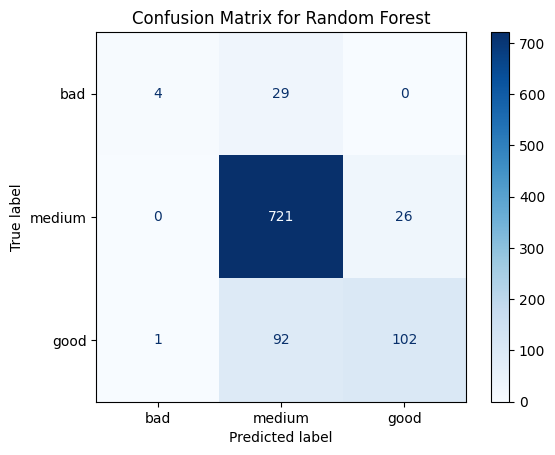

In [21]:
# Evaluate the best model on the test set
best_model_name = max(best_models, key=lambda name: best_models[name].score(X_test, y_test))
best_model = best_models[best_model_name]
y_test_pred = best_model.predict(X_test)

# Print evaluation metrics
print(f"Best Model: {best_model_name}")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_test_pred, average='weighted'):.4f}")

# Print classification report
print(f"\nClassification Report:\n{classification_report(y_test, y_test_pred, target_names=category_labels.values())}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=category_labels.values())
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix for {best_model_name}")
plt.show();

**Evaluation:**

- **Overall performance is good**: The model accurately predicts most instances.

- **Struggles with the `bad` class**: The model has difficulty correctly classifying instances belonging to the `bad` class, often misclassifying them as `medium`.

- **The `medium` class is predicted best**: The model achieves the highest accuracy when predicting instances belonging to the `medium` class.

The **Random Forest model** has achieved a fairly good performance but there is still room for improvement, especially in classifying the `bad` class. The suggestions above can significantly improve the model's performance.

We'll compute the ROC curve and the area under the curve (AUC) for each class. The AUC is a performance metric that quantifies the overall ability of the model to distinguish between classes: a value closer to 1 indicates a better model.

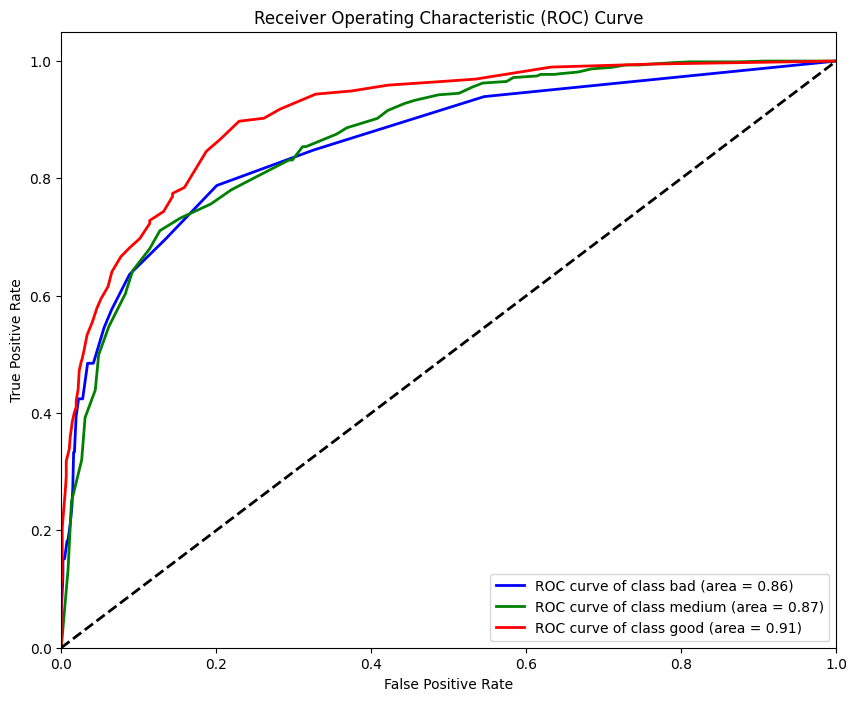

In [22]:
# Define colors for the plots
colors = ['blue', 'green', 'red']

# Binarize the output
y_test_binarized = pd.get_dummies(y_test).values

# Define the number of classes
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], best_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {category_labels[i]} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Overall Performance**: The model demonstrates good performance across all three classes, with ROC curves significantly above the diagonal line (random guessing). This indicates that the model can effectively distinguish between positive and negative instances for each class.

We will evaluate the feature importance for the Random Forest model. Feature importance helps us understand which features contribute the most to the model's predictions.

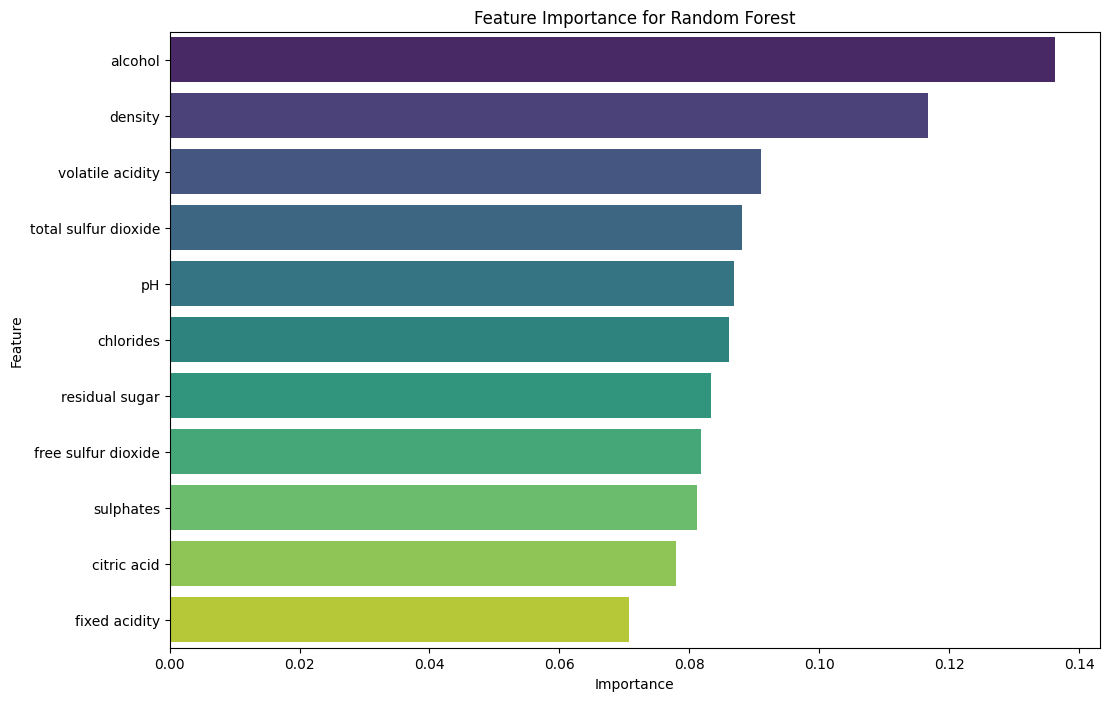

In [23]:
# Feature importance for Random Forest
if best_model_name == 'Random Forest':
    feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
    feature_importances = feature_importances.sort_values(ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
    plt.title('Feature Importance for Random Forest')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

The feature importance plot reveals that the **Random Forest model** has identified several key chemical and physical properties of the wine as the most influential factors in determining its quality. `Alcohol content`, `density`, and `volatile acidity` emerge as the most significant features, followed by total sulfur dioxide and other factors like sulphates, chlorides, and pH.

---

## 5. Conclusion


#### Model Performance Comparison
- **Random Forest**:
  - Achieved the highest accuracy (85.44%), precision (84.44%), recall (85.44%), and F1-score (83.53%).
  - Demonstrated superior performance in classifying wine quality compared to Logistic Regression and SVM.
  - Identified `alcohol content`, `density`, and `volatile acidity` as the most significant features.

- **Support Vector Machine (SVM)**:
  - Achieved good performance with accuracy (81.74%), precision (81.42%), recall (81.74%), and F1-score (78.24%).
  - Performed well but was slightly less effective than Random Forest.

- **Logistic Regression**:
  - Achieved the lowest performance among the three models with accuracy (78.87%), precision (77.26%), recall (78.87%), and F1-score (73.70%).
  - Struggled to capture complex patterns in the data compared to the other models.


#### Challenges and Potential Improvements
- **Class Imbalance**: The dataset is imbalanced, with most wines rated as `medium`. This imbalance can affect model performance, especially for the `bad` and `good` classes. Techniques such as oversampling, undersampling, or using class weights can help address this issue.
- **Feature Engineering**: Additional feature engineering and selection could improve model performance. Exploring interactions between features and creating new derived features might provide better insights.
- **Model Ensemble**: Combining multiple models through ensemble techniques (e.g., stacking, boosting) could enhance predictive performance by leveraging the strengths of different models.
- **Hyperparameter Tuning**: Further fine-tuning of hyperparameters using more extensive search methods (e.g., RandomizedSearchCV) could yield better results.
- **Cross-Validation**: Implementing cross-validation techniques beyond GridSearchCV, such as stratified k-fold cross-validation, can provide more robust performance estimates.

Overall, the **Random Forest model** demonstrated the best performance in classifying wine quality, but there is still room for improvement. Addressing the challenges and exploring potential improvements can further enhance the model's effectiveness and reliability.

---

## References

1. [Red Wine Quality Prediction Using Regression Modeling and Machine Learning - Dexter Nguyen](https://towardsdatascience.com/red-wine-quality-prediction-using-regression-modeling-and-machine-learning-7a3e2c3e1f46)
2. [scikit-learn Supervised Learning](https://scikit-learn.org/stable/supervised_learning.html)
3. [Random Forest Algorithm in Machine Learning - GeeksForGeeks](https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/)
4. [Logistic Regression in ML - GeeksForGeeks](https://www.geeksforgeeks.org/understanding-logistic-regression/)
5. [Support Vector Machine Algorithm - GeeksForGeeks](https://www.geeksforgeeks.org/support-vector-machine-algorithm/)
6. [Hyperparameter tuning](https://www.geeksforgeeks.org/hyperparameter-tuning/)
7. [Machine Learning Model Evalution](https://www.geeksforgeeks.org/machine-learning-model-evaluation/)